<a href="https://colab.research.google.com/github/AlexMcClung/IR-Tasks/blob/master/pandas-ifelse-case-when.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If-else and Case-when in Pandas  
Intended for those coming from R. Pandas does not ship with any obvious functions for if-else or case-when. Here are some examples of how to recode data in these situtations using just Pandas and not numpy.

In [14]:
import pandas as pd
import seaborn as sns

# example data set
df = sns.load_dataset('mpg')

df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
50,28.0,4,116.0,90.0,2123,14.0,71,europe,opel 1900
121,15.0,8,318.0,150.0,3399,11.0,73,usa,dodge dart custom
38,14.0,8,350.0,165.0,4209,12.0,71,usa,chevrolet impala
229,16.0,8,400.0,180.0,4220,11.1,77,usa,pontiac grand prix lj
211,16.5,6,168.0,120.0,3820,16.7,76,europe,mercedes-benz 280s


### Quick 1-0 Binaries

In [15]:
# equal some value example
df['european'] = (df['origin'] == 'europe').astype(int)

# lt gt example
df['guzzler'] = (df['mpg'] < 18).astype(int)

# multiple conditions
df['detroit_muscle'] = ((df['horsepower'] >= 200) & (df['origin'] == 'usa')).astype(int)

# is in example
df['non european'] = (df['origin'].isin(['usa','japan'])).astype(int)

print('------------------')
print(df['european'].value_counts(dropna=False))
print('------------------')
print(df['guzzler'].value_counts(dropna=False))
print('------------------')
print(df['detroit_muscle'].value_counts(dropna=False))
print('------------------')
print(df['non european'].value_counts(dropna=False))

------------------
european
0    328
1     70
Name: count, dtype: int64
------------------
guzzler
0    291
1    107
Name: count, dtype: int64
------------------
detroit_muscle
0    387
1     11
Name: count, dtype: int64
------------------
non european
1    328
0     70
Name: count, dtype: int64


### The .loc method

In [16]:
# two level example
df['Non US'] = 1
df.loc[df['origin'] == 'usa', 'Non US'] = 0

# multiple levels
df.loc[df['mpg'] < 18, 'mpg_lev'] = 'low'
df.loc[(df['mpg'] >= 18) & (df['mpg'] < 30), 'mpg_lev'] = 'medium'
df.loc[df['mpg'] >= 30, 'mpg_lev'] = 'high'

print(df['origin'].value_counts(dropna=False))
print('-----------------------')
print(df['Non US'].value_counts(dropna=False))
print('-----------------------')
print(df['mpg_lev'].value_counts(dropna=False))

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64
-----------------------
Non US
0    249
1    149
Name: count, dtype: int64
-----------------------
mpg_lev
medium    199
low       107
high       92
Name: count, dtype: int64


### Applying a lambda function

In [17]:
# Yes/No version of guzzler binary
df['guzzler_yn'] = df['mpg'].apply(lambda x: 'Yes' if x < 18 else 'No')

print(df['guzzler_yn'].value_counts())
print('------------------')

guzzler_yn
No     291
Yes    107
Name: count, dtype: int64
------------------


### Write and apply a function

In [18]:
def fxn(x):
  if x >= 23:
    return 'Definitely not a guzzler'
  elif (x >= 18) & (x < 23):
    return 'Not great on gas, but not a total guzzler'
  else:
    return 'Guzzler'

df['guzz_func'] = df['mpg'].apply(fxn)

print(df['guzz_func'].value_counts(dropna=False))

guzz_func
Definitely not a guzzler                     201
Guzzler                                      107
Not great on gas, but not a total guzzler     90
Name: count, dtype: int64


In [19]:
df.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

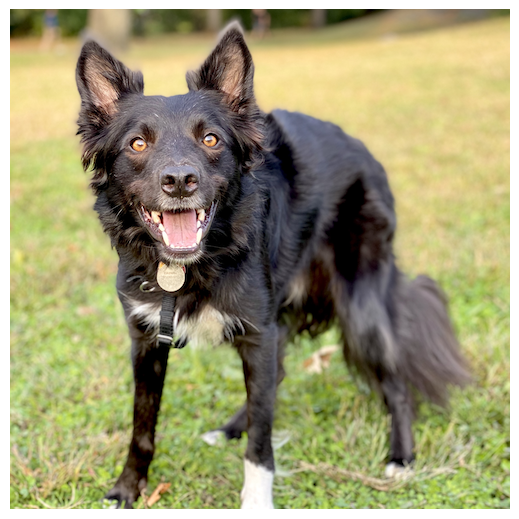

In [20]:
sns.dogplot()